In [1]:
!pip install nba_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.3/257.3 kB 2.2 MB/s eta 0:00:00


In [75]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load teams file
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)

In [4]:
# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [17]:
teams

[{'teamId': 1610612737,
  'abbreviation': 'ATL',
  'teamName': 'Atlanta Hawks',
  'simpleName': 'Hawks',
  'location': 'Atlanta'},
 {'teamId': 1610612738,
  'abbreviation': 'BOS',
  'teamName': 'Boston Celtics',
  'simpleName': 'Celtics',
  'location': 'Boston'},
 {'teamId': 1610612751,
  'abbreviation': 'BKN',
  'teamName': 'Brooklyn Nets',
  'simpleName': 'Nets',
  'location': 'Brooklyn'},
 {'teamId': 1610612766,
  'abbreviation': 'CHA',
  'teamName': 'Charlotte Hornets',
  'simpleName': 'Hornets',
  'location': 'Charlotte'},
 {'teamId': 1610612741,
  'abbreviation': 'CHI',
  'teamName': 'Chicago Bulls',
  'simpleName': 'Bulls',
  'location': 'Chicago'},
 {'teamId': 1610612739,
  'abbreviation': 'CLE',
  'teamName': 'Cleveland Cavaliers',
  'simpleName': 'Cavaliers',
  'location': 'Cleveland'},
 {'teamId': 1610612742,
  'abbreviation': 'DAL',
  'teamName': 'Dallas Mavericks',
  'simpleName': 'Mavericks',
  'location': 'Dallas'},
 {'teamId': 1610612743,
  'abbreviation': 'DEN',
  'tea

In [18]:
# Get team ID based on team name
def get_team_id(ABR):
  for team in teams:
    if team['abbreviation'] == ABR:
      return team['teamId']
  return -1 # building code to catch mistakes
# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return -1

In [19]:
# Get the team ID number for the Knicks
get_team_id('POR')
# >>> 1610612752


1610612757

In [9]:
# Get the player ID number for LeBron James
get_player_id('LeBron', 'James')
# >>> 2544

2544

In [51]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('GSW'),
            player_id = get_player_id('Stephen', 'Curry'),
            context_measure_simple = 'PTS',
            season_nullable = '2015-16',
            season_type_all_star = 'Regular Season')

In [52]:
# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

In [ ]:
shot_data

In [54]:
#relevant_data = shot_data["resultSets"][1]

In [55]:
# Get the relevant data from our dictionary
relevant_data1 = shot_data['resultSets'][0]

In [56]:
relevant_data1

{'name': 'Shot_Chart_Detail',
 'headers': ['GRID_TYPE',
  'GAME_ID',
  'GAME_EVENT_ID',
  'PLAYER_ID',
  'PLAYER_NAME',
  'TEAM_ID',
  'TEAM_NAME',
  'PERIOD',
  'MINUTES_REMAINING',
  'SECONDS_REMAINING',
  'EVENT_TYPE',
  'ACTION_TYPE',
  'SHOT_TYPE',
  'SHOT_ZONE_BASIC',
  'SHOT_ZONE_AREA',
  'SHOT_ZONE_RANGE',
  'SHOT_DISTANCE',
  'LOC_X',
  'LOC_Y',
  'SHOT_ATTEMPTED_FLAG',
  'SHOT_MADE_FLAG',
  'GAME_DATE',
  'HTM',
  'VTM'],
 'rowSet': [['Shot Chart Detail',
   '0021500003',
   6,
   201939,
   'Stephen Curry',
   1610612744,
   'Golden State Warriors',
   1,
   10,
   56,
   'Made Shot',
   'Cutting Finger Roll Layup Shot',
   '2PT Field Goal',
   'Restricted Area',
   'Center(C)',
   'Less Than 8 ft.',
   3,
   12,
   31,
   1,
   1,
   '20151027',
   'GSW',
   'NOP'],
  ['Shot Chart Detail',
   '0021500003',
   19,
   201939,
   'Stephen Curry',
   1610612744,
   'Golden State Warriors',
   1,
   9,
   13,
   'Made Shot',
   'Jump Shot',
   '3PT Field Goal',
   'Above the Bre

In [62]:
# Get the headers and row data
headers = relevant_data1['headers']
rows = relevant_data1['rowSet']

In [58]:
headers

['GRID_TYPE',
 'GAME_ID',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_NAME',
 'PERIOD',
 'MINUTES_REMAINING',
 'SECONDS_REMAINING',
 'EVENT_TYPE',
 'ACTION_TYPE',
 'SHOT_TYPE',
 'SHOT_ZONE_BASIC',
 'SHOT_ZONE_AREA',
 'SHOT_ZONE_RANGE',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'SHOT_ATTEMPTED_FLAG',
 'SHOT_MADE_FLAG',
 'GAME_DATE',
 'HTM',
 'VTM']

In [61]:
rows

[['League Averages',
  'Above the Break 3',
  'Back Court(BC)',
  'Back Court Shot',
  4,
  4,
  1.0],
 ['League Averages',
  'Above the Break 3',
  'Center(C)',
  '24+ ft.',
  3746,
  3746,
  1.0],
 ['League Averages',
  'Above the Break 3',
  'Left Side Center(LC)',
  '24+ ft.',
  5802,
  5802,
  1.0],
 ['League Averages',
  'Above the Break 3',
  'Right Side Center(RC)',
  '24+ ft.',
  5597,
  5597,
  1.0],
 ['League Averages',
  'Backcourt',
  'Back Court(BC)',
  'Back Court Shot',
  17,
  17,
  1.0],
 ['League Averages',
  'In The Paint (Non-RA)',
  'Center(C)',
  '8-16 ft.',
  2889,
  2889,
  1.0],
 ['League Averages',
  'In The Paint (Non-RA)',
  'Center(C)',
  'Less Than 8 ft.',
  7561,
  7561,
  1.0],
 ['League Averages',
  'In The Paint (Non-RA)',
  'Left Side(L)',
  '8-16 ft.',
  842,
  842,
  1.0],
 ['League Averages',
  'In The Paint (Non-RA)',
  'Right Side(R)',
  '8-16 ft.',
  799,
  799,
  1.0],
 ['League Averages',
  'Left Corner 3',
  'Left Side(L)',
  '24+ ft.',
  29

In [63]:
# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

In [ ]:
headers

In [65]:
curry_data.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [73]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    # This was the part that was missing from the other code and how would i have known
    # that this needed to be a gca plot... I mean now i know from experience but that is sometimes the very
    # frustrating part about coding in general people not saying how or where they got things
    # but now that you know it is a gca plot you can look up that for yourself

    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

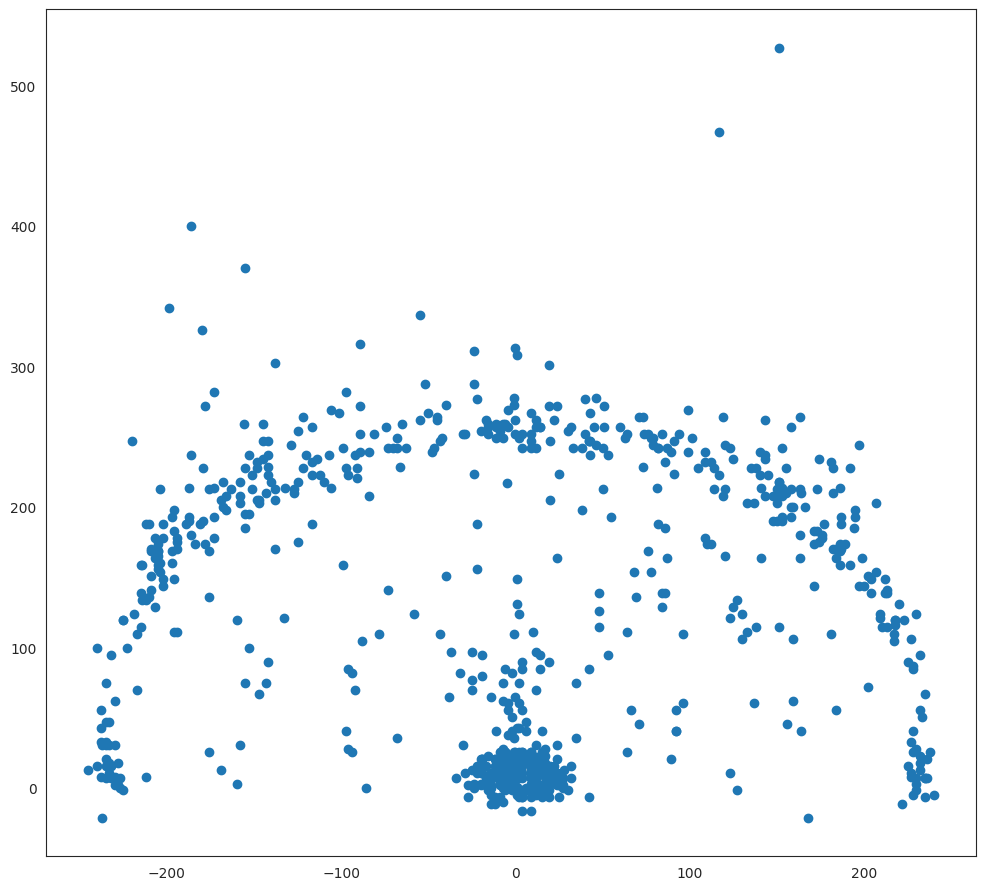

In [76]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(curry_data.LOC_X, curry_data.LOC_Y)
plt.show()

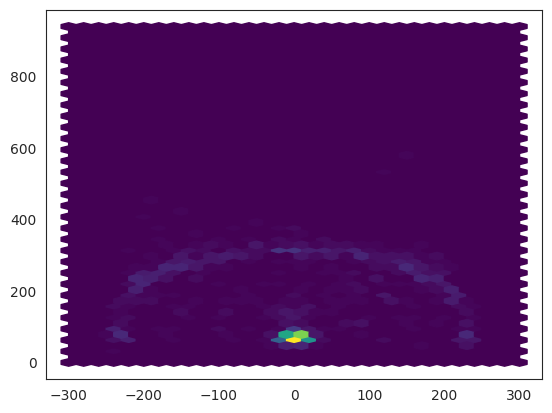

In [79]:
ax = plt.gca
# Plot hexbin of shots
# another example of shoddy code that people foist onto the world but it might give us ideas
# See if you can make this plot look nicer as part of your HW2

plt.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), cmap='viridis')

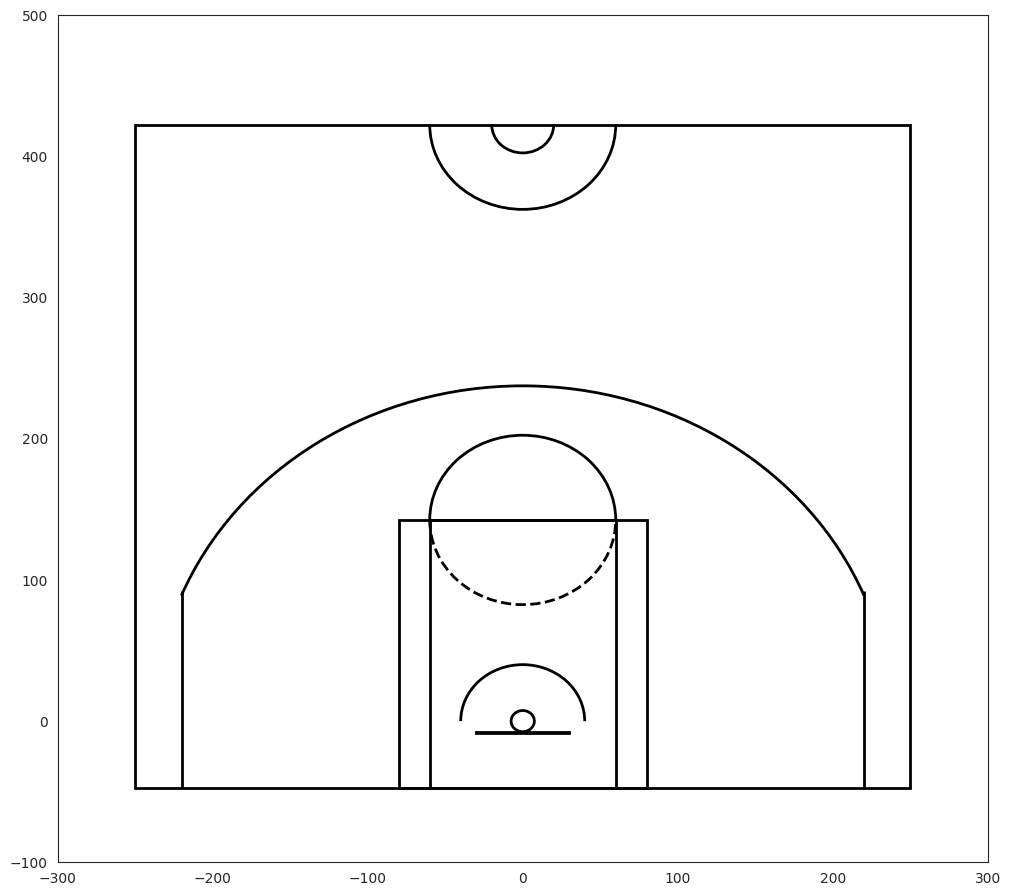

In [80]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

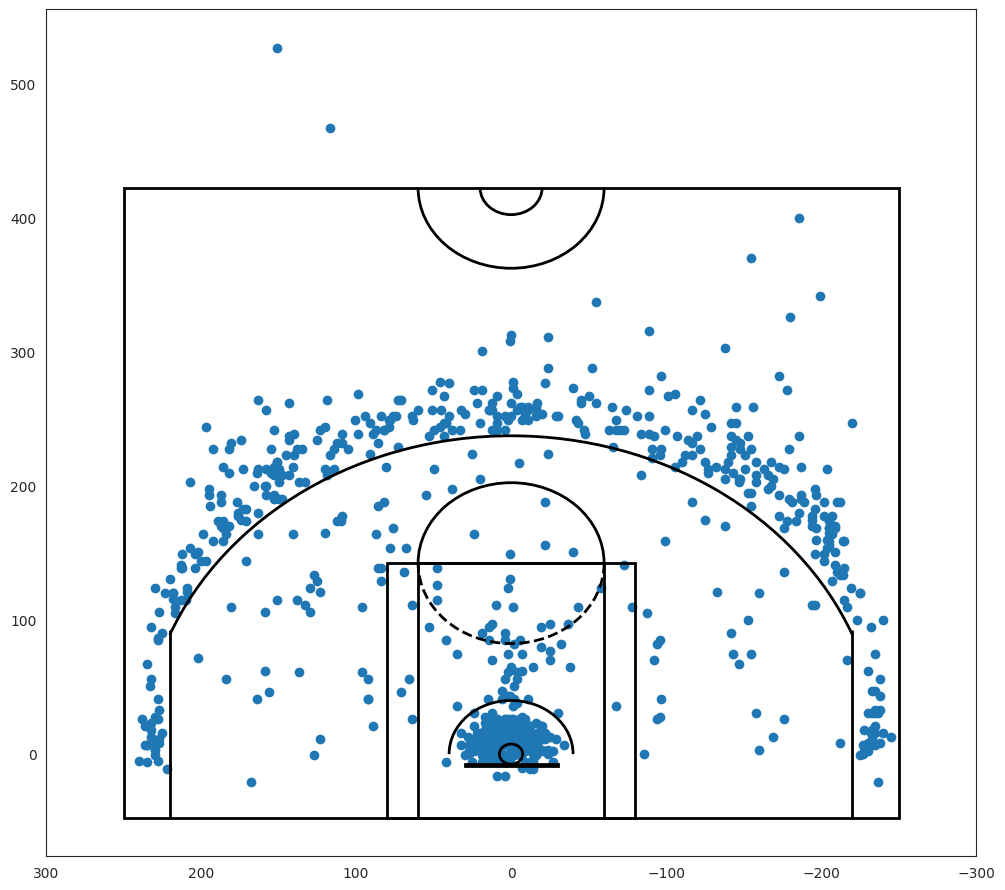

In [81]:
plt.figure(figsize=(12,11))
plt.scatter(curry_data.LOC_X, curry_data.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

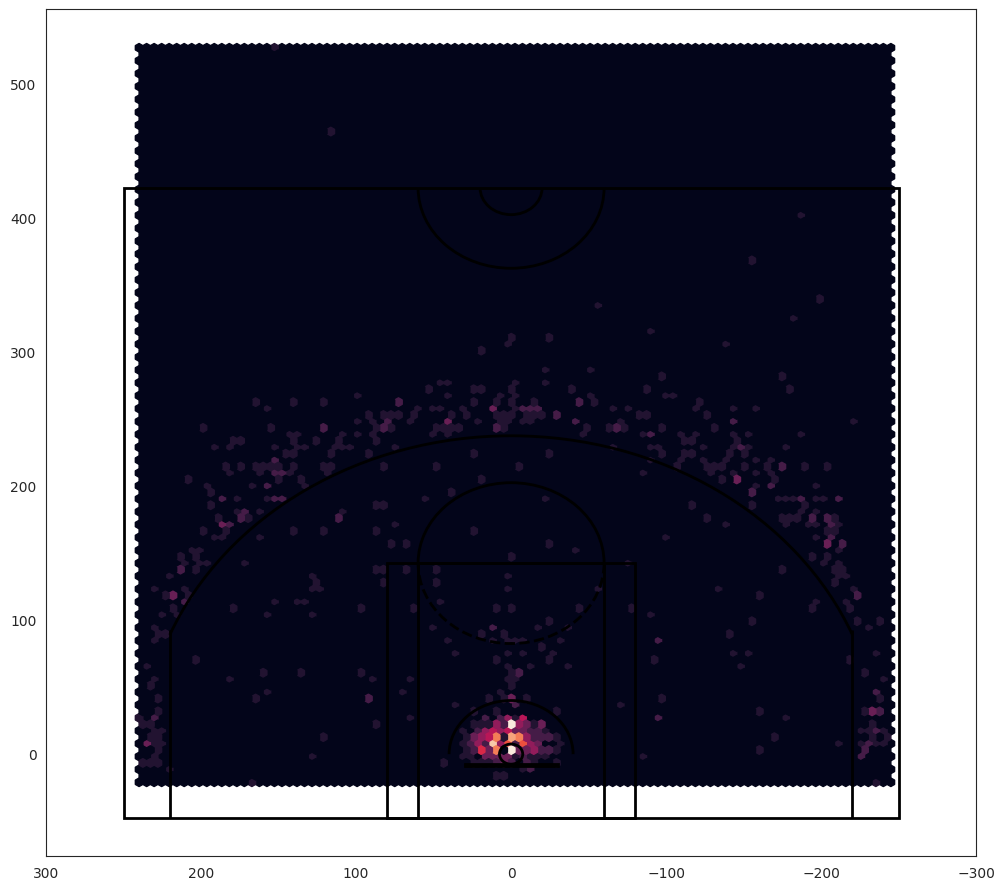

In [82]:
plt.figure(figsize=(12,11))
plt.hexbin(curry_data.LOC_X, curry_data.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

Helpful links and the examples

https://www.python-graph-gallery.com/84-hexbin-plot-with-matplotlib

https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

http://savvastjortjoglou.com/nba-shot-sharts.html